# Bank Marketing Classification Analysis

## Overview

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. We will be building a classification model to analyze the binary customer behavior (yes — subscribed or no — did not subscribe). The bank would then be able to use the same model to predict customer responses to future marketing initiatives.

## Approach

I used OSEMN Framework (Obtain-Scrub-Explore-Model-Interpret), which is one of the most common ways of doing analysis and building predictive models.

### Goal

The goal is to identify clients that would subscribe to the term deposit.

## Data Description:


- <b>age</b> (numeric)

- <b>job</b> : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

- <b>marital</b> : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

- <b>education</b> (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

- <b>default</b>: has credit in default? (categorical: 'no','yes','unknown'
                                    
- <b>housing</b>: has housing loan? (categorical: 'no','yes','unknown')
                                     
- <b>loan</b>: has personal loan? (categorical: 'no','yes','unknown'))

- <b>contact</b>: contact communication type (categorical: 'cellular','telephone')
    
- <b>month</b>: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    
- <b>day_of_week</b>: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    
- <b>duration</b>: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- <b>campaign</b>: number of contacts performed during this campaign and for this client (numeric, includes last contact)

- <b>pdays</b>: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

- <b>previous</b>: number of contacts performed before this campaign and for this client (numeric)

- <b>poutcome</b>: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

- <b>emp.var.rate</b>: employment variation rate - quarterly indicator (numeric)

- <b>cons.price.idx</b>: consumer price index - monthly indicator (numeric)

- <b>cons.conf.idx</b>: consumer confidence index - monthly indicator (numeric)
    
- <b>euribor3m</b>: euribor 3 month rate - daily indicator (numeric)

- <b>nr.employed</b>: number of employees - quarterly indicator (numeric)

- <b>y</b> - has the client subscribed a term deposit? (binary: 'yes','no')


 source of the dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing

## Obtain

In [64]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc


import warnings
warnings.filterwarnings("ignore")

In [2]:
bank_df = pd.read_csv('./Data/bank-additional-full.csv',sep=';')

In [3]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_df.shape

(41188, 21)

In [5]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Scrub

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

looking at some summary statistics.

In [7]:
#summary statistics
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


checking for Null values in the dataset

In [8]:
#checking for Null values 
bank_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
bank_df['y'].unique()

array(['no', 'yes'], dtype=object)

convert the target column y to numerical data 0 for 'no' and 1 for 'yes'

In [10]:
for i in range (len(bank_df.y)):
    if bank_df.y[i] == 'no':
        bank_df.y[i] = 0
    else:
        bank_df.y[i] = 1
        
bank_df.y.unique()            

array([0, 1], dtype=object)

And how many 'yes' customers do we actually have?

In [11]:
bank_df.y.sum()

4640

An 11.3% Sucess rate on a phone marketing campaign is very reasonable.

In [12]:
bank_df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

Data has unknown values and instead of replacing, keeping them to check how model performs.

In [13]:
print(len(bank_df[bank_df['job'] == 'unknown']) / len(bank_df))


0.008012042342429833


In [14]:
bank_df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [15]:
len(bank_df[bank_df['housing'] == 'unknown']) / len(bank_df)

0.0240361270272895

In [16]:
bank_df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [17]:
len(bank_df[bank_df['default'] == 'unknown']) / len(bank_df)

0.20872584247839177

In [18]:
bank_df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Default column has only 3 positive cases. so dropping them

In [19]:
bank_df.drop('default', axis=1, inplace=True)

In [20]:
bank_df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

'pdays' column with '999' means customer was not previously contacted. so dropping them. 

In [21]:
bank_df.drop('pdays', axis=1, inplace=True)

In [22]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   duration        41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

In [23]:
# selecting the numeric and categorical variable

cat_feat = bank_df.select_dtypes(include = 'object')
con_feat = bank_df.select_dtypes(include = ['int64', 'float64'])

In [24]:
#Generating numeric value for categorical variable
cat_df = pd.get_dummies(cat_feat, drop_first=True)

In [25]:
#concatenating numeric and categorical columns 

df = pd.concat([con_feat, cat_df], axis = 1)

In [26]:
df.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'y_1'],
      dtype='object')

## Explore

In [27]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

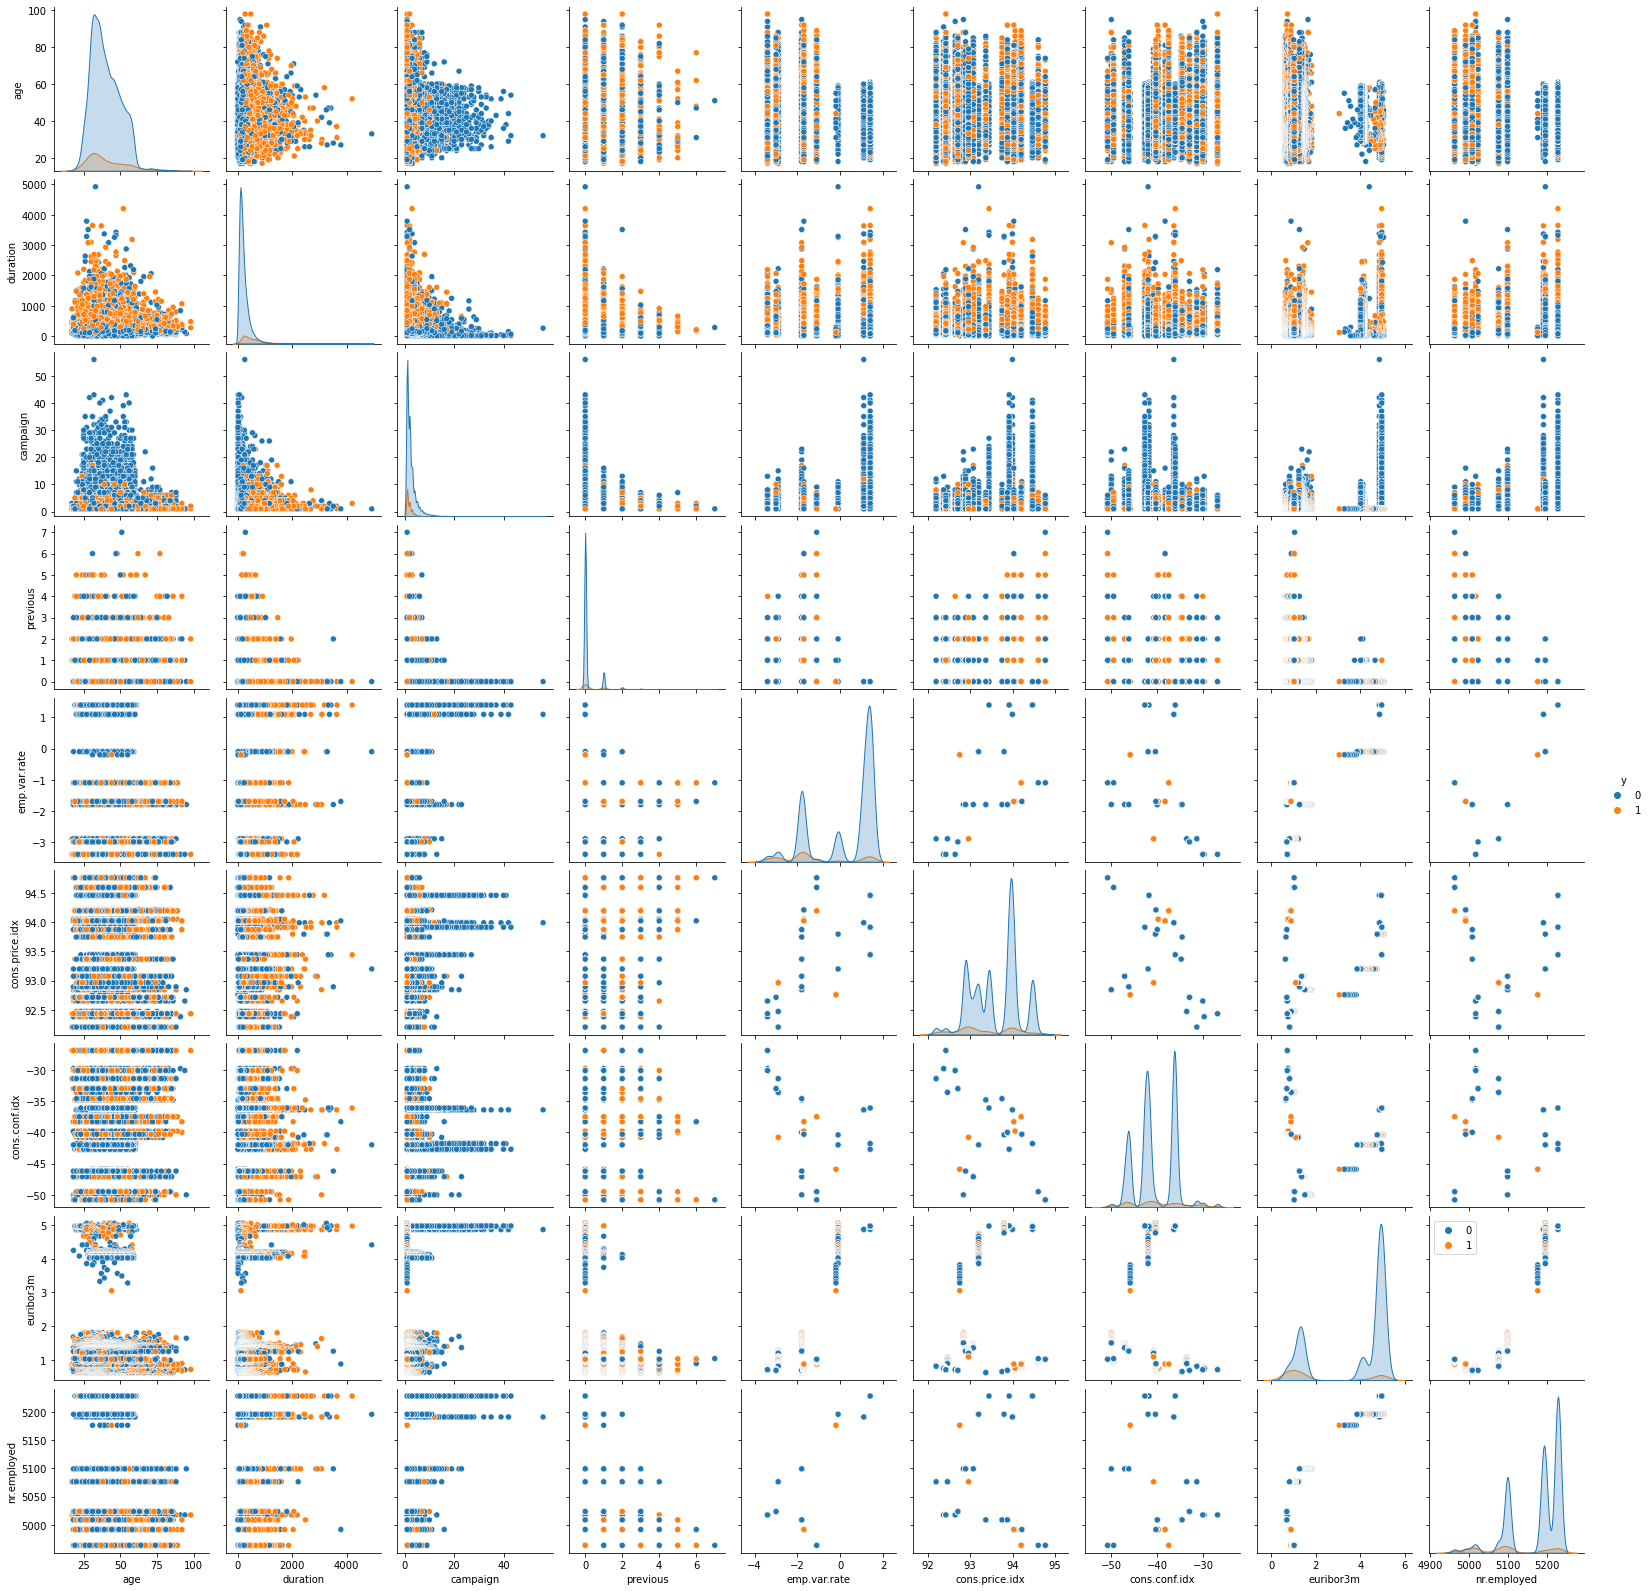

In [28]:
sns.pairplot(data=bank_df,hue='y')
plt.legend()
plt.show()

In [29]:
# selecting categorical column for plotting
categorical_df=bank_df[['job','marital','education','housing', 'loan','contact','month','day_of_week', 'campaign', 'poutcome']]

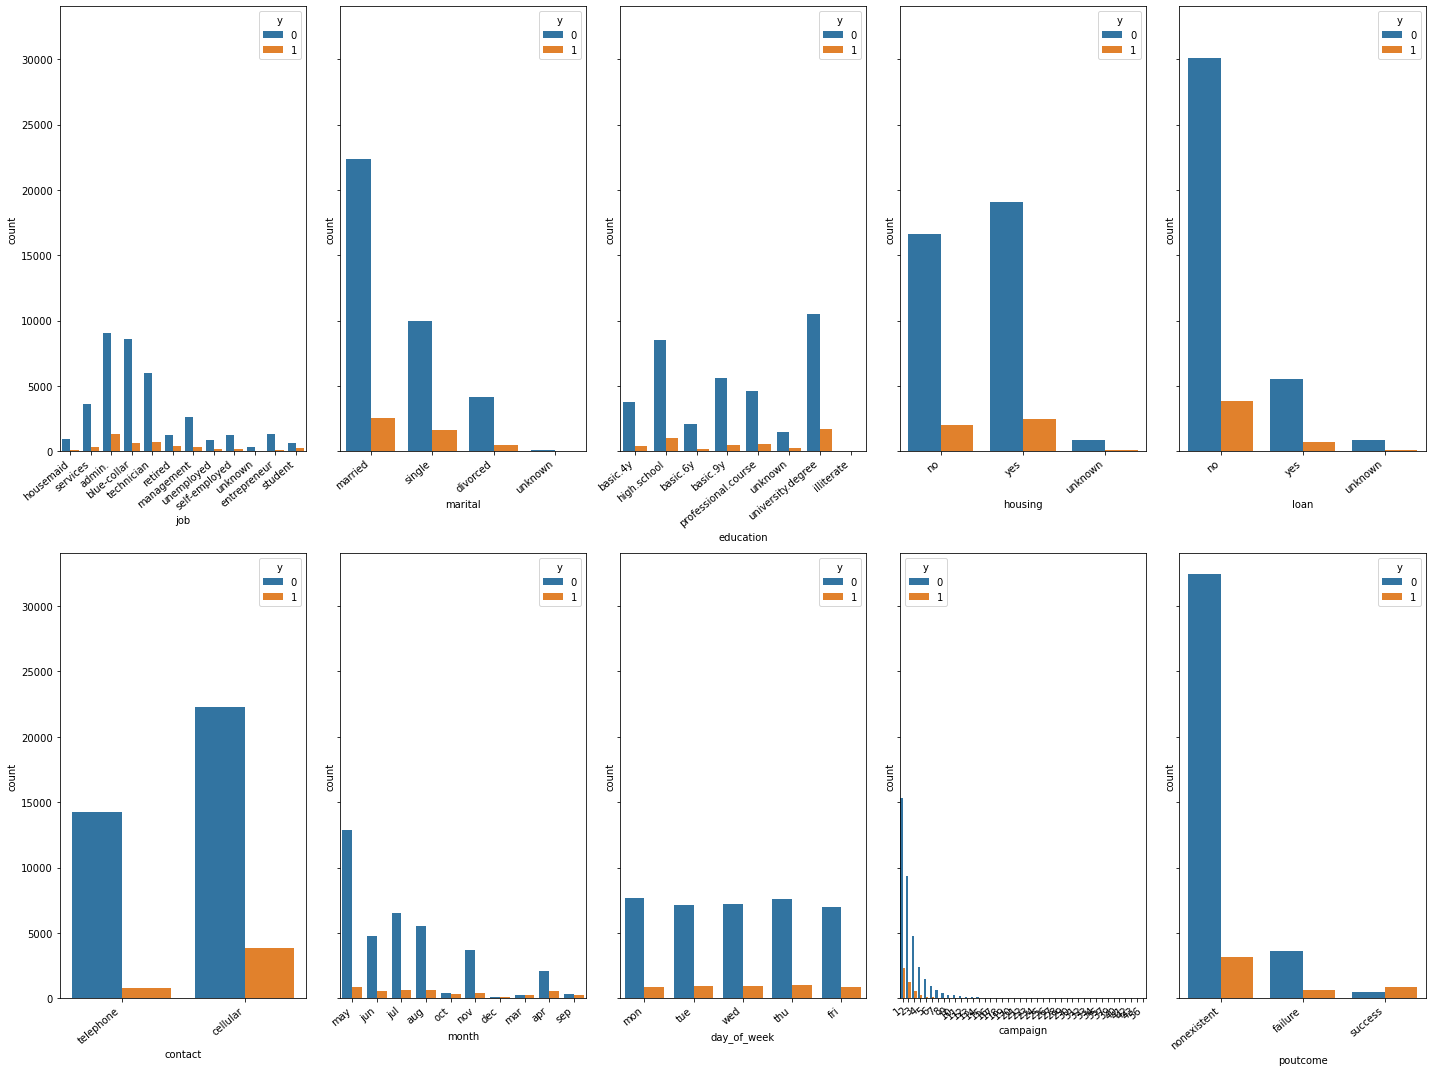

In [30]:
fig, axes = plt.subplots(2,5, figsize=(20, 15), sharey=True)
for col,ax in zip(categorical_df.columns,axes.flatten()):
    sns.countplot(x=col, hue='y',data=bank_df,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()


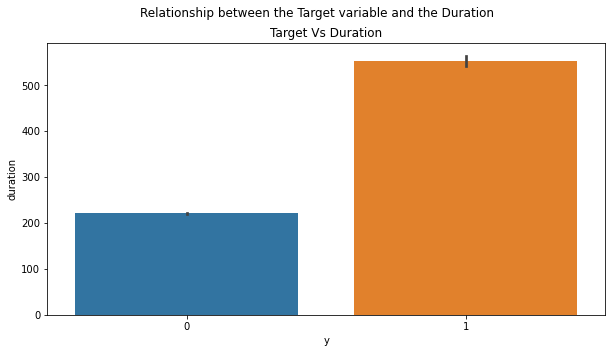

In [31]:
# plotting between the target variable and duration of the call

fig, axes = plt.subplots(figsize=(10, 5))
fig.suptitle('Relationship between the Target variable and the Duration')

sns.barplot(x=bank_df['y'], y=bank_df['duration']).set_title('Target Vs Duration')
plt.savefig('./Images/duration.png', bbox_inches = 'tight')


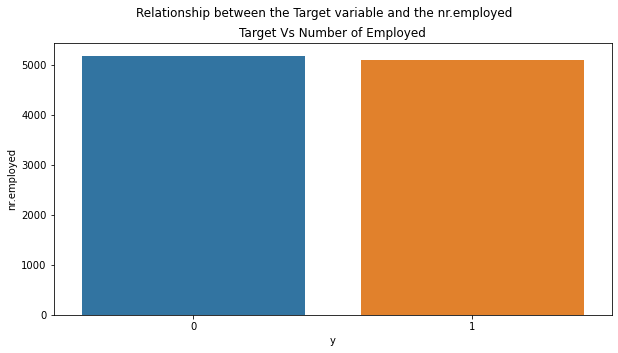

In [32]:
# plotting between target variable and number of employee
fig, axes = plt.subplots(figsize=(10, 5))
fig.suptitle('Relationship between the Target variable and the nr.employed')

sns.barplot(x=bank_df['y'], y=bank_df['nr.employed']).set_title('Target Vs Number of Employed')
plt.savefig('./Images/nremp.png', bbox_inches = 'tight')

In [33]:
bank_df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

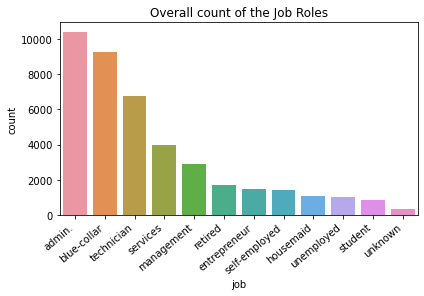

In [34]:
# Plotting the countplot for job 
ax = sns.countplot(x="job", data=bank_df,order=bank_df['job'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Overall count of the Job Roles')
plt.savefig('./Images/job.png', bbox_inches = 'tight')

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_1
age,1.000000,0.000866,0.004594,0.024365,0.000371,0.000857,0.129372,0.010767,0.017725,0.024191,...,0.030045,0.053008,0.040889,0.019027,0.021356,0.019137,0.023671,0.016376,0.035626,0.030399
duration,0.000866,1.000000,0.071699,0.020640,0.027968,0.005312,0.008173,0.032897,0.044703,0.012992,...,0.015941,0.015454,0.018011,0.023068,0.014666,0.004140,0.014537,0.011665,0.044876,0.405274
campaign,0.004594,0.071699,1.000000,0.079141,0.150754,0.127836,0.013733,0.135133,0.144095,0.001775,...,0.079028,0.049126,0.033953,0.014405,0.005141,0.025125,0.021088,0.087645,0.050893,0.066357
previous,0.024365,0.020640,0.079141,1.000000,0.420489,0.203130,0.050936,0.454494,0.501333,0.054845,...,0.081050,0.127754,0.157651,0.002012,0.001512,0.000090,0.003929,0.878776,0.524045,0.230181
emp.var.rate,0.000371,0.027968,0.150754,0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,0.057264,...,0.105917,0.213706,0.170366,0.018139,0.007673,0.014582,0.026797,0.472501,0.256886,0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,0.075322,...,0.215273,0.092174,0.046905,0.001273,0.017143,0.001216,0.012479,0.304264,0.077416,0.136211
cons.conf.idx,0.129372,0.008173,0.013733,0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.101567,...,0.052892,0.170425,0.169175,0.041382,0.027877,0.050033,0.023711,0.099724,0.084824,0.054878
euribor3m,0.010767,0.032897,0.135133,0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,0.046775,...,0.019524,0.185937,0.190321,0.023279,0.013757,0.022732,0.030201,0.488406,0.281022,0.307771
nr.employed,0.017725,0.044703,0.144095,0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,0.063921,...,0.027593,0.273236,0.292156,0.017433,0.002658,0.009923,0.023272,0.493051,0.350613,0.354678
job_blue-collar,0.024191,0.012992,0.001775,0.054845,0.057264,0.075322,0.101567,0.046775,0.063921,1.000000,...,0.062053,0.049034,0.054309,0.009754,0.007062,0.006829,0.020673,0.043843,0.061403,0.074423


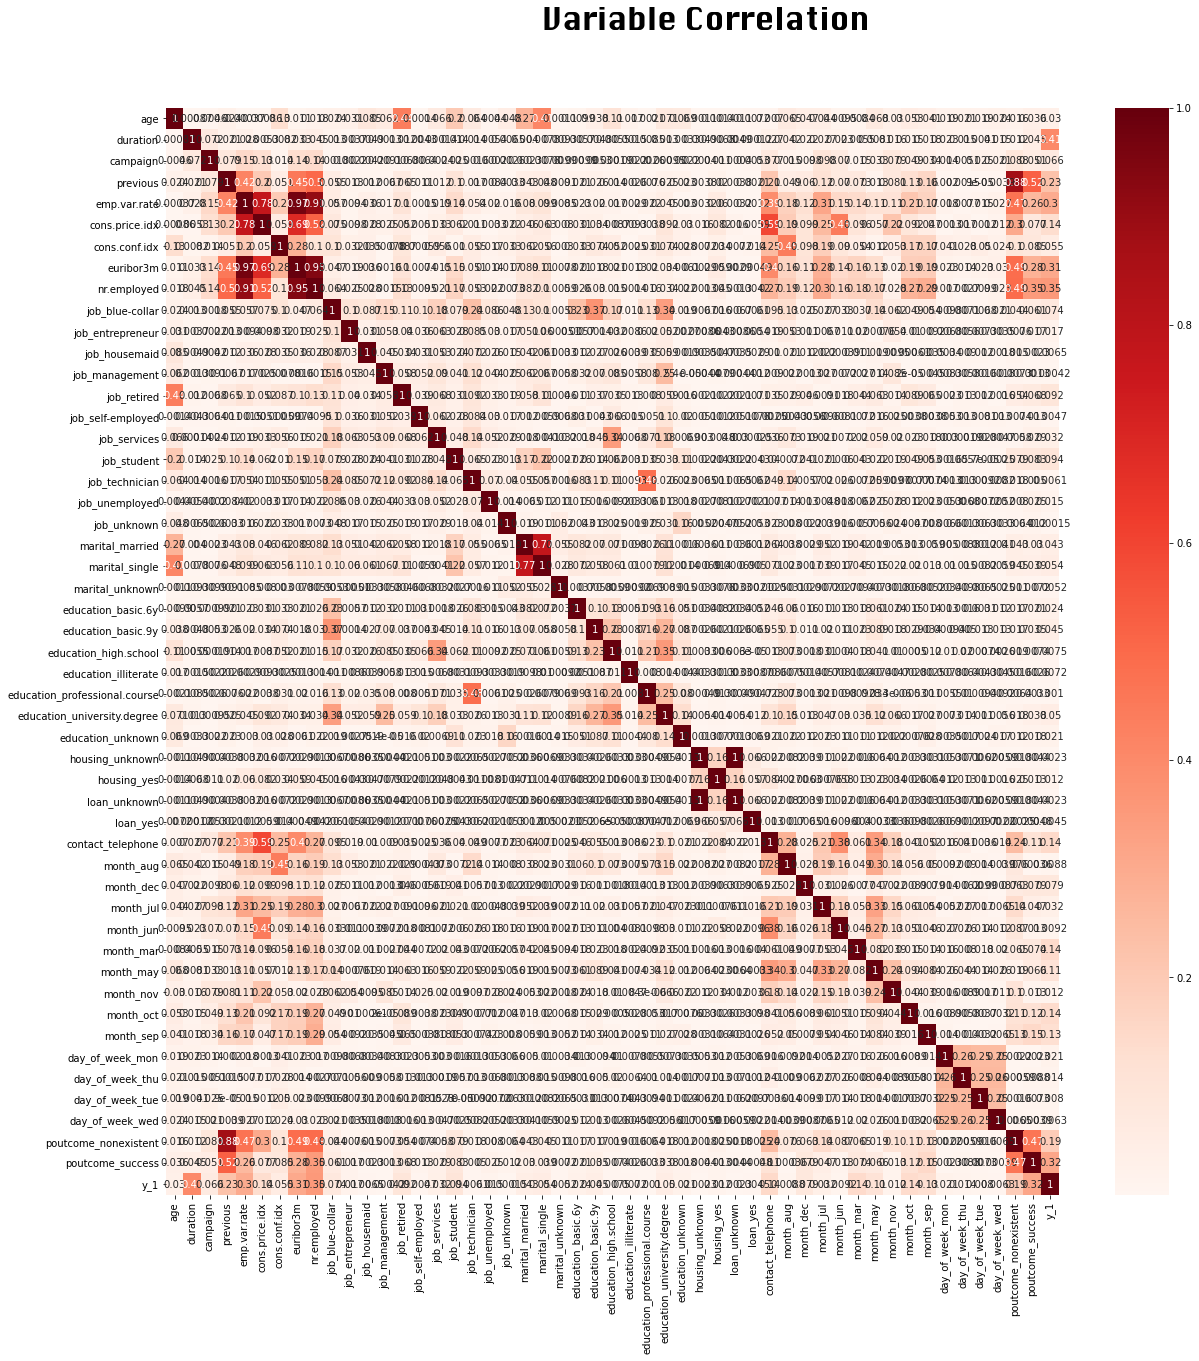

In [35]:
# plotting heatmap to check the collinearity with tha target variable
corr=df.corr().abs()
fig,ax=plt.subplots(figsize=(20,20))
fig.suptitle('Variable Correlation',fontsize=30,y=.95,fontname='Silom')
heatmap=sns.heatmap(corr,cmap='Reds', annot = True)
corr

## Model

### Logistic Regression Model

In [36]:
# define X and y
y = df['y_1']
X = df.drop('y_1', axis=1)

In [37]:
# Splitting our data for train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [38]:
#Scaling the data

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Fit the Model

In [39]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [40]:
#predicting the train and test data

train_pred = logreg.predict(X_train_scaled)
test_pred = logreg.predict(X_test_scaled)

In [57]:
#Calculating the score
print('Accuracy: ', accuracy_score(y_test, test_pred))
print('Recall:', recall_score(y_test, test_pred))
print('Precision:', precision_score(y_test, test_pred))
print('F1_score:', f1_score(y_test, test_pred))

Accuracy:  0.812575867929109
Recall: 0.946524064171123
Precision: 0.3720050441361917
F1_score: 0.5340977670488835


In [43]:
#plotting confusion matrix
confusion_matrix(y_test, test_pred)

array([[5809, 1494],
       [  50,  885]])

In [44]:
df['y_1'].value_counts()

0    36548
1     4640
Name: y_1, dtype: int64

In [45]:
df['y_1'].value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y_1, dtype: float64

Finding the class imbalance in the training and test sets.

In [46]:
print(y_train.value_counts())
print('\n')
# Test set
print(y_test.value_counts())

0    29245
1     3705
Name: y_1, dtype: int64


0    7303
1     935
Name: y_1, dtype: int64


Our dataset consist of imbalanced data and has majority value of 0. So i'm applying SMOTE to handle data imbalance.

In [47]:
#Applying smote and fit the data

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)
print(pd.Series(y_train_resampled).value_counts()) 

1    29245
0    29245
Name: y_1, dtype: int64


In [59]:
# Initializing Logistic Regression and fit the model

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
modelreg = logreg.fit(X_train_resampled, y_train_resampled)

In [49]:
train_preds = logreg.predict(X_train_resampled)
test_preds = logreg.predict(X_test_scaled)

In [58]:
#Calculating the accuracy score
print('Accuracy: ', accuracy_score(y_test, test_preds))
print('Recall:', recall_score(y_test, test_preds))
print('Precision:', precision_score(y_test, test_preds))
print('F1_score:', f1_score(y_test, test_preds))

Accuracy:  0.4839766933721777
Recall: 0.558288770053476
Precision: 0.11972477064220184
F1_score: 0.1971671388101983


In [60]:
# model coefficient
modelreg.coef_

array([[-2.02949170e-02,  5.52228583e-03, -1.05830834e-01,
        -6.67466702e-01, -1.74456068e+00,  1.11613903e+00,
         1.94079016e-03,  1.67159674e+00, -2.04096077e-02,
        -2.15551198e+00, -1.74496708e+00, -2.50413900e+00,
        -1.11226381e+00, -1.22120357e+00, -1.87880726e+00,
        -1.35901755e+00, -8.21073350e-01, -9.79926148e-01,
        -1.50718803e+00, -9.74990613e-01, -1.00306589e+00,
        -1.11196647e+00, -3.74816616e-01, -1.95078602e+00,
        -2.02355600e+00, -2.64948147e+00, -6.45668633e-02,
        -2.31060357e+00, -2.27397648e+00, -2.44622568e+00,
        -4.39156667e-01, -4.67235575e-01, -4.39156667e-01,
        -5.25154462e-01, -1.23384030e+00, -5.84705959e-01,
        -9.49283748e-01, -1.30587441e+00, -1.24056892e+00,
         6.47795215e-01, -1.77905238e+00, -2.36402910e+00,
        -1.70191994e+00, -1.79550284e+00, -1.53992792e+00,
        -1.41125483e+00, -1.29177342e+00, -1.14881346e+00,
        -8.42582105e-01,  1.47691604e+00]])

In [61]:
#creating dictionary to map the column values with the coefficient
dict(zip(X_train.columns, modelreg.coef_[0]))

{'age': -0.02029491697033503,
 'duration': 0.005522285831856721,
 'campaign': -0.10583083440010688,
 'previous': -0.6674667016735037,
 'emp.var.rate': -1.744560677135397,
 'cons.price.idx': 1.1161390309790515,
 'cons.conf.idx': 0.0019407901572908817,
 'euribor3m': 1.671596743361223,
 'nr.employed': -0.020409607710371987,
 'job_blue-collar': -2.155511981575748,
 'job_entrepreneur': -1.744967082698516,
 'job_housemaid': -2.5041390040995632,
 'job_management': -1.1122638078324032,
 'job_retired': -1.2212035716446947,
 'job_self-employed': -1.8788072593529503,
 'job_services': -1.3590175520614332,
 'job_student': -0.8210733496398704,
 'job_technician': -0.9799261483514199,
 'job_unemployed': -1.5071880329886806,
 'job_unknown': -0.9749906126381563,
 'marital_married': -1.0030658890346182,
 'marital_single': -1.1119664692764117,
 'marital_unknown': -0.37481661609301636,
 'education_basic.6y': -1.9507860165449582,
 'education_basic.9y': -2.023555999761156,
 'education_high.school': -2.649481

In [53]:
# calculating confusion matrix
confusion_matrix(y_test, test_preds)

array([[3465, 3838],
       [ 413,  522]])

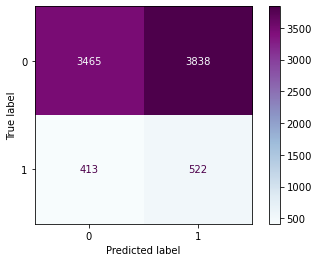

In [62]:
# plotting confusion matrix
plot_confusion_matrix(modelreg, X_test_scaled, y_test,cmap = plt.cm.BuPu)
plt.grid(False)

Tuning for better prediction

Let us tune our model with different C values for better prediction

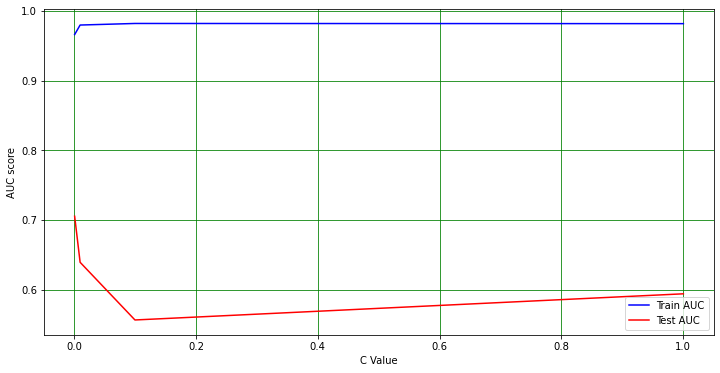

In [69]:
C = [0.001, 0.01, 0.1, 1]
train_preds = []
test_preds = []
for i in C:
    logreg = LogisticRegression(C = i, solver = 'liblinear')
    logreg.fit(X_train_resampled, y_train_resampled )
    train_pred = logreg.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, logreg.predict_proba(X_train_resampled)[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = logreg.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize = (12, 6))
plt.plot(C, train_preds, 'b', label = 'Train AUC')
plt.plot(C, test_preds, 'r', label = 'Test AUC')
plt.ylabel('AUC score')
plt.xlabel('C Value')
plt.legend()
plt.grid()
plt.show()

